
<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h1 id="tutorial1" style="text-align: justify">Tutorial: LC-MS Metabolomics Data Analysis Workflow</h1>

</div>

<p style="text-align: justify">
This Jupyter notebook uses Python language and describes a typical metabolomics data analysis workflow for a study with a binary classification outcome. The main steps included are: </p>

<ul>

#### LC-MS multivariate data analysis and data vizualisation:<br>
<li style="text-align: justify">Import metabolite &amp; experimental data from an Excel sheet. </li>

<li style="text-align: justify">Pooled QC-based data cleaning.</li>

<li style="text-align: justify">Principal Component Analysis visualisation to check data quality.</li>

<li style="text-align: justify">Two-class univariate statistics.</li>

<li style="text-align: justify">Multivariate analysis using Partial Least Squares Discriminant Analysis (PLS-DA) including:


<ul>
<li style="text-align: justify">model optimisation (R<sup>2</sup> vs Q<sup>2</sup>).</li>

<li style="text-align: justify">permutation testing, model prediction metrics.</li>

<li style="text-align: justify">feature importance.</li>

<li style="text-align: justify">model prediction data visualisations.</li></ul>
</li>

<li style="text-align: justify">Export statistical tables to Excel sheets.</li>

</ul>

<p style="text-align: justify">
The Quality Control analysis on this LC-MS data has already been done.</p>



<div style="background-color:rgb(255,210,210); padding:5px;  border: 10px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/cog2.png">
<div style="padding-left:80px; text-align: justify">
<b style="text-align: justify">Red boxes (cog icon) provide suggestions for changing the functionality of the subsequent code cell by editing (or substituting) one or more lines of code / Make sure to use these instructions during the second analysis round using LC-MS</b><br>
</div></div>

<div style="background-color:rgb(210,250,210); padding:5px;  border: 10px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/mouse.png">
<div style="padding-left:80px; text-align: justify">
<b style="text-align: justify"> Green boxes (mouse icon) provide suggestions for interacting with the visual results generated by a code cell. For example, the first green box in the notebook describes how to sort and colour data in the embedded data tables.</b><br>
</div></div>

<div style="background-color:rgb(210,250,255); padding:5px;  border: 10px solid rgb(255, 250, 250); border-bottom: 10px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">
<b style="text-align: justify">Blue boxes (lightbulb icon) provide further information about the theoretical reasoning behind a block of code or visualisation. This information is not essential to understand Jupyter notebooks but may be of general educational utility and interest to new metabolomics data scientists.</b><br>
</div></div>



<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial (below this text box) imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools that extend the basic functionality of the Python language.
<br></p>
</div>

<div style="background-color:rgb(210,250,255); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">

<ul>
<li style="text-align: justify">All the code embedded in this example notebook is written using the Python programming language (<a href="http://www.python.org">python.org</a>) and is based upon extensions of popular open source packages with high levels of support. 
    
<em>Note:</em> a tutorial on the python programming language in itself is beyond the scope of this notebook. For more information on using Python and Jupyter Notebooks please refer to the excellent: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>, which is in itself a Jupyter Notebook deployed via <a href="https://mybinder.org">Binder</a>.</li>
</ul>
</div> </div>
<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">
    
<p style="text-align: justify">The first code cell of this tutorial (below this text box) imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools that extend the basic functionality of the Python language. We will need the following tools  to analyse the data in this tutorial:<br></p>

<ul>
<li style="text-align: justify"><a href="http://www.numpy.org/"><code>numpy</code></a>: the fundamental package for scientific computing with Python, providing tools to work with arrays and linear algebra</li>

<li style="text-align: justify"><a href="https://pandas.pydata.org/"><code>pandas</code></a>: provides high-performance, easy-to-use data structures and data analysis tools</li>

<li style="text-align: justify"><a href="http://beakerx.com/"><code>beakerx</code></a>: provides interactive tools for the Jupyter notebook environment</li>

<li style="text-align: justify"><a href="https://scikit-learn.org/stable/"><code>sklearn</code></a>: tools for machine learning in Python


<ul>
<li style="text-align: justify"><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><code>train_test_split</code></a>: a method to split arrays into random test/training subsets for cross-validation</li></ul>
</li>

<li style="text-align: justify"><a href="https://github.com/KevinMMendez/cimcb_lite"><code>cimcb_lite</code></a>: a library of helpful functions provided by the authors</li>
</ul>

<p style="text-align: justify"><strong>Run the cell by clicking anywhere in the cell (the cell will be surrounded by a blue box) and then clicking <kbd>Run</kbd> in the Menu.</strong> <br>
When successfully executed the cell will print <code>All packages successfully loaded</code> in the notebook below the cell.</p>
</div>


In [181]:
import numpy as np
import pandas as pd
import seaborn as sns

from beakerx.object import beakerx
from sklearn.model_selection import train_test_split

import cimcb_lite as cb

beakerx.pandas_display_table()  # by default display pandas tables as BeakerX interactive tables


print('All packages successfully loaded')

All packages successfully loaded


In [203]:
import lux

<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h2 id="2loaddataandpeaksheet" style="text-align: justify">2. Load Data and Peak sheet</h2>

<p style="text-align: justify">This workflow requires data to be uploaded as a Microsoft Excel file, using the <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> framework (i.e. each column is a variable, and row is an observation). As such, the Excel file should contain a <em>Data Sheet</em> and <em>Peak Sheet</em>. The <em>Data Sheet</em> contains all the metabolite concentrations and metadata associated with each observation (requiring the inclusion of the columns: <em>Idx</em>, <em>SampleID</em>, and <em>Class</em>). The <em>Peak Sheet</em> contains all the metadata pertaining to each measured metabolite (requiring the inclusion of the columns: <em>Idx</em>, <em>Name</em>, and <em>Label</em>). Please inspect the <a href="GastricCancer_NMR.xlsx">Excel file</a> used in this tutorial before proceeding. </p>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file, using the CIMCB helper function <code>load_dataXL()</code>. When this is complete, you should see confirmation that Peak (stored in the <code>Peak</code> worksheet in the Excel file) and Data (stored in the <code>Data</code> worksheet in the Excel file) tables have been loaded:</p>

<pre style="text-align: justify"><code class="text language-text">Loadings PeakFile: Peak
Loadings DataFile: Data
Data Table &amp; Peak Table is suitable.
TOTAL SAMPLES: 140 TOTAL PEAKS: 149
Done!
</code></pre>

<p style="text-align: justify">Once loaded, the data is available for use in <a href="https://swcarpentry.github.io/python-novice-gapminder/02-variables/"><em>variables</em></a> called <code>dataTable</code> and <code>peakTable</code>.</p>
</div>

<div style="background-color:rgb(255,210,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="80" src="images/cog2.png">
<div style="padding-left:80px; text-align: justify"> 

<ul>
<li style="text-align: justify">The data we use in this tutorial has been converted to standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format. This data has been previously published as an article <a href="https://link.springer.com/article/10.1007%2Fs11306-016-1059-9">Gardlo et al. (2016)</a> in  <i>Metabolomics</i>. 
    
The data we use here is urine samples collected from newborns with perinatal asphyxia, analysed using a Dionex UltiMate 3000 RS system coupled to a triple quadrupole QTRAP 5500 tandem mass spectrometer. The deconvoluted and annotated file is deposited at the <a href="https://www.ebi.ac.uk/metabolights/">Metabolights</a> data repository (Project ID <a href="https://www.ebi.ac.uk/metabolights/MTBLS290">MTBLS290</a>). 

Please inspect the <a href="MTBLS290db.xlsx">Excel file</a> before using it in this tutorial. To change the data set to be loaded into the notebook, give the correct Excel filename to the variable <code>filename</code>,and press <mark><kbd>Run</kbd></mark> on the menu bar.

<b>Note: if you change the name of the file in this code cell, you will also have to make changes to <a href=#5>Section 5</a> and <a href=#6>Section 6</a> (as indicated in the text cell above each) for the correct models to be built. It is probably best to come back to this excercise after finishing an initial walk-through of the complete tutorial using the default data set (<a href="MTBLS290db.xlsx">MTBLS290 Excel file</a>).</b></li>
</ul>
</div></div>

In [2]:
# The path to the input file (Excel spreadsheet)
filename = 'MTBLS290db.xlsx'

# Load Peak and Data tables into two variables
dataTable, peakTable = cb.utils.load_dataXL(filename, DataSheet='Data', PeakSheet='Peak')

Loadings PeakFile: Peak
Loadings DataFile: Data
Data Table & Peak Table is suitable.
TOTAL SAMPLES: 95 TOTAL PEAKS: 236
Done!


<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">
<h3 id="21displaythedatatable" style="text-align: justify">2.1 Display the <code>Data</code> table</h3>

<p style="text-align: justify">The <code>dataTable</code> table can be displayed interactively so we can inspect and check the imported values. To do this, we use the <code>display()</code> function.
<br></p>
<p style="text-align: justify">Note that each row describes a single urine sample, where:</p>
<ul>
    <li style="text-align: justify">Columns <b>M1</b> ... <b>M236</b> descibe metabolite concentrations.</li>
    <li style="text-align: justify">Column <b>SampleType</b> indicates whether the sample was a pooled QC or a study sample.</li>
    <li style="text-align: justify">Column <b>Class</b> indicates the clincal outcome observed for that individual: <i>Control</i> for the healthy control and <i>Patient</i> for the newborns with perinatal asphyxia.</li>
</ul>
</div>
<div style="background-color:rgb(210,250,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/mouse.png">
<div style="padding-left:80px; text-align: justify">

<ul>
<li style="text-align: justify">Scroll up/down &amp; left/right using the scroll bars</li>
<li style="text-align: justify">Click on any column header to sort by that column (sort alternates between ascending and decending order)</li>
<li style="text-align: justify">Click on the left side of a header column for futher options 
<ul>
<li style="text-align: justify">for column <b>Class</b> click on <i>'color by unique'</i></li>
<li style="text-align: justify">for column <b>SampleType</b> click on <i>'sort ascending'</i> to group all the <em>QC</em> samples together.</li></ul>
</li>
<li style="text-align: justify">Click on column header <b>index</b> to sort back into the orginal order.</li>
</ul>
</div></div>

In [178]:
display(dataTable)

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,QC,SampleType,SampleID,Batch,Class,Organism,Organism part,Protocol REF,Sample Name,...,M227,M228,M229,M230,M231,M232,M233,M234,M235,M236
1,1,1,QC,QC9,1,QC,Homo sapiens,urine,Sample collection,QC9,...,1.840437e+06,1.157473e+06,2.337840e+06,2.337840e+06,1.192120e+07,5142625.314,3458768.755,35781.321000,215370.03980,215370.03980
2,2,1,QC,QC10,1,QC,Homo sapiens,urine,Sample collection,QC10,...,1.823570e+06,1.145890e+06,2.422276e+06,2.422276e+06,1.244483e+07,5538666.710,3880201.326,26458.177500,207555.09750,207555.09750
3,3,0,Sample,p1t2,1,Patient,Homo sapiens,urine,Sample collection,p1t2,...,5.221017e+05,2.799688e+05,7.173147e+05,7.173147e+05,9.543276e+05,3096407.411,2495386.327,33861.188000,158135.27600,158135.27600
4,4,0,Sample,p3t4,1,Patient,Homo sapiens,urine,Sample collection,p3t4,...,4.295461e+05,1.458601e+05,4.846860e+05,4.846860e+05,7.824380e+06,1198829.931,1644833.483,2517.150000,54213.82050,54213.82050
5,5,0,Sample,K1,1,Control,Homo sapiens,urine,Sample collection,K1,...,7.789649e+05,1.828575e+05,1.399567e+06,1.399567e+06,1.386025e+06,1238145.996,4866463.710,101284.743000,157686.61250,157686.61250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,1,QC,QC25,1,QC,Homo sapiens,urine,Sample collection,QC25,...,1.243153e+06,9.233404e+05,2.105752e+06,2.105752e+06,1.249861e+07,4537308.645,5065655.534,25116.459500,155394.65600,155394.65600
92,92,0,Sample,p4t6,1,Patient,Homo sapiens,urine,Sample collection,p4t6,...,1.261530e+06,1.182810e+06,1.282581e+06,1.282581e+06,1.377885e+07,6596443.767,1831086.017,7958.785500,44950.32318,44950.32318
93,93,0,Sample,p5t5,1,Patient,Homo sapiens,urine,Sample collection,p5t5,...,5.490089e+05,1.563210e+05,1.287826e+06,1.287826e+06,2.601829e+07,3423099.339,1340791.235,5321.822968,145036.69060,145036.69060
94,94,0,Blank,Blank4,1,Blank,blank,blank,Sample collection,Blank4,...,8.901942e+04,1.102709e+05,4.964008e+04,4.964008e+04,1.416756e+04,20368.501,20239.415,356.187500,1190.13100,1190.13100


<div style="background-color:rgb(255, 250, 250); padding:5px; padding-left: 1em; padding-right: 1em;">

<h3 id="22displaythepeaksheet" style="text-align: justify">2.2. Display the <code>Peak</code> sheet</h3>

<p style="text-align: justify">The <code>peakTable</code> table can also be displayed interactively so we can inspect and check the imported values. To do this, we again use the <code>display()</code> function. For this example the imported data consists of 236 metabolites (the same as in the <code>dataTable</code> data)</p>

<p style="text-align: justify">Each row describes a single metabolite, where</p>

<ul>
<li style="text-align: justify">Column <strong>Idx</strong> is a unique metabolite index.</li>

<li style="text-align: justify">Column <strong>Name</strong> is the column header corresponding to this metabolite in the <code>dataTable</code> table.</li>

<li style="text-align: justify">Column <strong>Label</strong> provides a unique name for the metabolite (or a <code>uNNN</code> identifier)</li>

<li style="text-align: justify">Column <strong>Perc_missing</strong> indicates what percentage of samples do not contain a measurement for this metabolite (missing data). </li>

<li style="text-align: justify">Column <strong>QC_RSD</strong> is a quality score representing the variation in measurements of this metabolite across all samples. </li>


</div>

<div style="background-color:rgb(210,250,210); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/mouse.png">
<div style="padding-left:80px"> 

<ul>
<li style="text-align: justify">Click on the column header <strong>QC_RSD</strong> to sort the peaks by ascending value</li>
<li style="text-align: justify">Click on the left edge of the column header <strong>QC_RSD</strong> and select <em>'heatmap'</em></li>
<li style="text-align: justify">Scroll up/down to see how the "quality" of the peaks increase/decrease</li>
</ul>
</div></div>

In [179]:
display(peakTable)

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,Name,Label,QC_RSD,Perc_missing,database_identifier,chemical_formula,smiles,inchi,metabolite_identification,taxid,species
1,1,M1,L-Valine,4.119400,0,CHEBI:16414,C5H11NO2,CC(C)[C@H](N)C(O)=O,"InChI=1S/C5H11NO2/c1-3(2)4(6)5(7)8/h3-4H,6H2,1...",L-Valine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
2,2,M2,L-Tyrosine,7.213483,0,CHEBI:17895,C9H11NO3,N[C@@H](Cc1ccc(O)cc1)C(O)=O,InChI=1S/C9H11NO3/c10-8(9(12)13)5-6-1-3-7(11)4...,L-Tyrosine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
3,3,M3,L-Tryptophan,7.825443,0,CHEBI:16828,C11H12N2O2,N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O,InChI=1S/C11H12N2O2/c12-9(11(14)15)5-7-6-13-10...,L-Tryptophan,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
4,4,M4,L-Threonine,9.196762,0,CHEBI:16857,C4H9NO3,C[C@@H](O)[C@H](N)C(O)=O,"InChI=1S/C4H9NO3/c1-2(6)3(5)4(7)8/h2-3,6H,5H2,...",L-Threonine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
5,5,M5,L-Homoserine,9.196762,0,CHEBI:15699,C4H9NO3,N[C@@H](CCO)C(O)=O,"InChI=1S/C4H9NO3/c5-3(1-2-6)4(7)8/h3,6H,1-2,5H...",L-Homoserine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,M232,octenoyl-L-carnitine,6.511420,0,CHEBI:85526,C15H27NO4,C[N+](C)(C)C[C@@H](CC([O-])=O)OC([*])=O,NaN,octenoyl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
233,233,M233,nonayl-L-carnitine,16.569282,0,CHEBI:70997,C16H31NO4,CCCCCCCCC(=O)OC(CC([O-])=O)C[N+](C)(C)C,InChI=1S/C16H31NO4/c1-5-6-7-8-9-10-11-16(20)21...,nonayl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
234,234,M234,propionylglycine,18.489419,0,CHEBI:89836,C5H9NO3,C(CNC(=O)CC)(=O)O,"InChI=1S/C5H9NO3/c1-2-4(7)6-3-5(8)9/h2-3H2,1H3...",propionylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens
235,235,M235,tiglylglycine,16.673262,0,CHEBI:73018,C7H11NO3,CC=C(/C)C(=O)NCC(O)=O,InChI=1S/C7H11NO3/c1-3-5(2)7(11)8-4-6(9)10/h3H...,tiglylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens


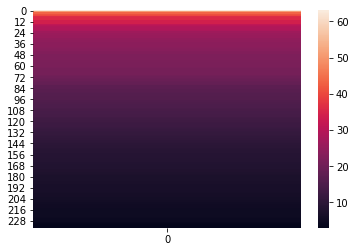

In [201]:
sns.heatmap(np.asarray(np.sort(peakTable['QC_RSD'])[::-1]).reshape(236,1))

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">On this heatmap, we can see the distribution of <strong>QC_RSD</strong>.</p>

</div>

<div style="background-color:rgb(255, 250, 250); padding:10px;  padding-left: 1em; padding-right: 1em;">

<h2 id="3datacleaning" style="text-align: justify">3. Data Cleaning</h2>

<h3 id="31cleaningpeakTable" style="text-align: justify">3.1 Cleaning peakTable</h3>

<p style="text-align: justify">It is good practice to assess the quality of your data, and remove (clean out) any poorly measured metabolites, before performing any statistical or machine learning modelling <a href="https://link.springer.com/article/10.1007/s11306-018-1367-3">Broadhurst <em>et al.</em> 2018</a>.</a> For the perinatal asphyxia data set used in this example we have already calculated some basic statistics for each metabolite and stored them in the Peak table. In this notebook we keep only metabolites that meet the following criteria:</p>

<ul>
<li style="text-align: justify">a QC-RSD less than 20% </li>

<li style="text-align: justify">fewer than 10% of values are missing</li>
</ul>

<p style="text-align: justify">It would be interesting to see the impact of these criterias on the ability of the model to predict the correct output.</p>

<p style="text-align: justify">When the data is cleaned, the number of remaining peaks will be reported.</p>
</div>
<div style="background-color:rgb(255,210,210); padding:2px; border-top: 20px solid rgb(255, 250, 250); border-left: 20px solid rgb(255, 250, 250); border-right: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="60" src="images/cog2.png">
<div style="padding-left:80px"> 
    
<ul>
<li style="text-align: justify">Replace the code: <code>PeakTableClean = peakTable[(rsd &lt; 20) &amp; (percMiss &lt; 10]</code> with: <code>peakTableClean = peakTable[(rsd &lt; 10) &amp; (percMiss &lt; 5)]</code>. In doing this you will see the effect of making the data cleaning criteria more stringent. This will change the number of 'clean' metabolites.</li>
</ul>
</div></div>
<div style="background-color:rgb(210,250,255); padding:2px; border: 20px solid rgb(255, 250, 250); padding-right: 1em;">
<img align="left" width="40" src="images/bulb.png">
<div style="padding-left:80px; text-align: justify">    
<ul>
<li style="text-align: justify"><b>Note: Changing the number of clean metabolites will significantly change the outputs from all subsequent code cells.</b><br> So be sure to click on <mark><kbd>Cell</kbd></mark><font color='black'>→</font><mark><kbd>Run All Below</kbd></mark> then scroll down the notebook to see how changing this setting has changed all the cell outputs.</li>
</ul>
</div></div>

In [5]:
# Create a clean peak table 

rsd = peakTable['QC_RSD']  
percMiss = peakTable['Perc_missing']

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">
For the analysis, we need a quality control RSD not too high to be confident about the measurements of the metabolites.<br>
The point of this notebook is to create a model able to predict if the patient is ill or not, according to the metabolite concentrations.<br>
It would be interesting to study the impact of the parameters accross the creation of our model.<br>
</p>
    
</div>

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<h4 id="311impactpercmissing" style="text-align: justify">3.1.1 Impact of percMiss i.e. the percentage of missing values</h4>
    
</div>

In [6]:
percMiss.sum()

0

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">
It means there is no missing value in this dataset i.e. all the metabolites have been measured for all the samples.
</p>
    
</div>

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<h4 id="312impactrsd" style="text-align: justify">3.1.2 Impact of rsd i.e. the quality of the measurements</h4>
    
</div>

In [7]:
rsd.mean()

15.500754436590114

In [8]:
for i in range(5, 40, 5):
    print("RSD < {1} : we keep {0:.1f}% of the metabolites ({2}/{3})".format(sum(rsd < i)/len(rsd) * 100, i, sum(rsd < i), len(rsd))) 

RSD < 5 : we keep 4.7% of the metabolites (11/236)
RSD < 10 : we keep 38.6% of the metabolites (91/236)
RSD < 15 : we keep 55.5% of the metabolites (131/236)
RSD < 20 : we keep 69.5% of the metabolites (164/236)
RSD < 25 : we keep 86.9% of the metabolites (205/236)
RSD < 30 : we keep 92.8% of the metabolites (219/236)
RSD < 35 : we keep 95.3% of the metabolites (225/236)


<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">It would be interesting to see the impact of the threshold of RSD on the quality of model's predictions.</p>
    
</div>

In [10]:
RSD_threshold = 20

In [11]:
peakTableClean = peakTable[(rsd < RSD_threshold)]   

print("Number of peaks remaining: {}".format(len(peakTableClean)))

Number of peaks remaining: 164


<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<h3 id="32cleaningdataTable" style="text-align: justify">3.2 Cleaning dataTable</h3>

<h4 id="321impactpercmissing" style="text-align: justify">3.2.1 Delete rows of class Blank</h4>

<p style="text-align: justify">We notice that four samples have the class 'Blank'. We will drop these samples just to be sure not to compromise our analysis.</p>
</div> 

In [12]:
dataTable['Class'].value_counts()

Patient    50
Control    23
QC         18
Blank       4
Name: Class, dtype: int64

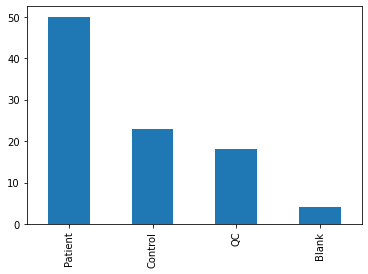

In [13]:
dataTable['Class'].value_counts().plot.bar()

In [14]:
dataTableClean = dataTable[(dataTable['Class'] != 'Blank')]

In [15]:
dataTableClean['Class'].value_counts()

Patient    50
Control    23
QC         18
Name: Class, dtype: int64

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<h4 id="321rowsNaN" style="text-align: justify">3.2.2 Manage rows with NaN</h4>

<p style="text-align: justify">We have the choice for this part:</p>

<ul>
<li style="text-align: justify">delete rows with Nan for our analysis</li>
<li style="text-align: justify">use KNN to fill the missing values</li>
</ul>
    
<p style="text-align: justify">It would be interesting to see the impact on the quality of model's predictions.</p>

</div>

In [123]:
peakList = peakTableClean['Name']

In [124]:
len(peakList) == 164

True

In [125]:
X = dataTableClean[peakList]
X.shape

(91, 164)

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">X is a pandas dataFrame of the concentrations of the 164 metabolites with RSD less than threshold_RSD we fixed previously, for the 91 samples (all samples except the ones of class 'Blank').</p>

<p style="text-align: justify"><strong>---------------------------------------------- You can run this part or not ---------------------------------------------</strong><br>
If you do, you will delete the rows with missing values. If you don't, these missing values will be filled using KNN.
</p>
  
</div>

In [99]:
sum(X.isnull().any(axis=1).values)

3

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

<p style="text-align: justify">We notice that there is NaN cells in X even if <strong>Perc_missing</strong> was all 0 in peakTable.<br>Here we delete these rows with missing values from X.</p>
  
</div>

In [111]:
X = X[[not elem for elem in X.isnull().any(axis=1).values]]

In [113]:
X.shape

(88, 164)

<div style="background-color:rgb(255, 250, 250); padding:2px; padding-left: 1em; padding-right: 1em;">

After the cleaning, we have a matrix of 164 metabolites measured on 88 samples. No NaN is X now.

<p style="text-align: justify"><strong>----------------------------------------------- To this point ----------------------------------------------</strong><br></p>
    
</div>

## 4. PCA

In [129]:
Xlog = np.log10(X)
Xscale = cb.utils.scale(Xlog, method='auto')
Xknn = cb.utils.knnimpute(Xscale, k=3)

In [130]:
print("Xknn: {} rows & {} columns".format(*Xknn.shape))

Xknn: 91 rows & 164 columns


In [131]:
cb.plot.pca(Xknn,
            pcx=1,                                                  # pc for x-axis
            pcy=2,                                                  # pc for y-axis
            group_label=dataTableClean['SampleType'])                    # labels for Hover in PCA loadings plot

Loading BokehJS ...

We notice that all the QC samples all located in the same zone of the PCA espace.

## 5. Univariate Statistics for the comparison of patient samples (class Patient) and healthy control (class Control)

In [132]:
# Select subset of Data for statistical comparison
dataTable2 = dataTableClean[(dataTableClean.Class == "Patient") | (dataTableClean.Class == "Control")]
pos_outcome = "Patient" 

# Calculate basic statistics and create a statistics table.
statsTable = cb.utils.univariate_2class(dataTable2,
                                        peakTableClean,
                                        group='Class',                # Column used to determine the groups
                                        posclass=pos_outcome,         # Value of posclass in the group column
                                        parametric=True)              # Set parametric = True or False

# View and check StatsTable
display(statsTable)

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,Name,Label,Grp0_Mean,Grp0_Mean-95CI,Grp1_Mean,Grp1_Mean-95CI,Sign,TTestStat,TTestPvalue,bhQvalue,TotalMissing,PercTotalMissing,Grp0_Missing,Grp1_Missing,ShapiroW,ShapiroPvalue,LeveneW,LevenePvalue
1,1,M1,L-Valine,5.244887e+06,"(4491450.27, 5998322.97)",5.545127e+06,"(4331758.62, 6758496.07)",0,-0.315376,7.534014e-01,7.920374e-01,0,0.00,0.0,0.0,0.777461,3.747347e-09,3.271624,0.074722
2,2,M2,L-Tyrosine,1.575108e+06,"(1431809.78, 1718407.21)",2.717772e+06,"(1879691.42, 3555852.29)",1,-1.800176,7.608059e-02,1.299710e-01,0,0.00,0.0,0.0,0.512019,3.418058e-14,4.616478,0.035078
3,3,M3,L-Tryptophan,2.349444e+06,"(2031463.15, 2667425.67)",2.250154e+06,"(1530027.38, 2970280.25)",0,0.179026,8.584271e-01,8.584271e-01,0,0.00,0.0,0.0,0.628796,2.698033e-12,2.857905,0.095312
4,4,M4,L-Threonine,2.396310e+06,"(2058864.96, 2733755.46)",3.766546e+06,"(2916619.09, 4616472.26)",1,-2.101100,3.918314e-02,7.933376e-02,0,0.00,0.0,0.0,0.751929,8.927917e-10,8.301170,0.005236
5,5,M5,L-Homoserine,2.396310e+06,"(2058864.96, 2733755.46)",3.766546e+06,"(2916619.09, 4616472.26)",1,-2.101100,3.918314e-02,7.933376e-02,0,0.00,0.0,0.0,0.751929,8.927917e-10,8.301170,0.005236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,232,M232,octenoyl-L-carnitine,1.447543e+06,"(1160507.2, 1734579.08)",5.216149e+06,"(3458113.96, 6974183.41)",1,-2.831071,6.030528e-03,1.947143e-02,0,0.00,0.0,0.0,0.564406,2.187460e-13,5.739221,0.019229
161,233,M233,nonayl-L-carnitine,2.349432e+06,"(1793881.18, 2904983.42)",2.874130e+06,"(2373579.23, 3374680.72)",1,-1.239455,2.192584e-01,2.971767e-01,0,0.00,0.0,0.0,0.910798,7.633910e-05,1.278910,0.261907
162,234,M234,propionylglycine,4.065475e+04,"(32862.38, 48447.12)",1.172689e+04,"(8296.81, 15156.97)",0,7.766421,4.917372e-11,4.032245e-09,1,1.37,0.0,2.0,0.836923,1.954432e-07,1.919579,0.170302
163,235,M235,tiglylglycine,1.124844e+05,"(99546.07, 125422.67)",1.102544e+05,"(95942.96, 124565.75)",1,0.190874,8.491694e-01,8.570558e-01,0,0.00,0.0,0.0,0.938763,1.504953e-03,4.172571,0.044797


In [133]:
# Save StatsTable to Excel
statsTable.to_excel("stats_LCMS.xlsx", sheet_name='StatsTable', index=False)
print("done!")

done!


## 6. Machine learning

### 6.1 Train-test split

In [141]:
dataTable2.shape

(73, 248)

In [138]:
peakTableClean.shape

(164, 12)

In [143]:
dataTable2['Class'].value_counts()

Patient    50
Control    23
Name: Class, dtype: int64

In [144]:
# Create a Binary Y vector for stratifiying the samples
outcomes = dataTable2['Class']                                  # Column that corresponds to Y class (should be 2 groups)
Y = [1 if outcome == 'Patient' else 0 for outcome in outcomes]       # Change Y into binary (GC = 1, HE = 0)  
Y = np.array(Y)                                                 # convert boolean list into to a numpy array

# Split DataTable2 and Y into train and test (with stratification)
dataTrain, dataTest, Ytrain, Ytest = train_test_split(dataTable2, Y, test_size=0.25, stratify=Y, random_state=10)

print("DataTrain = {} samples with {} postive cases.".format(len(Ytrain),sum(Ytrain)))
print("DataTest = {} samples with {} postive cases.".format(len(Ytest),sum(Ytest)))

DataTrain = 54 samples with 37 postive cases.
DataTest = 19 samples with 13 postive cases.


In [145]:
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1])

### 6.2. Determine optimal number of components for PLS-DA model

In [147]:
# Extract and scale the metabolite data from the dataTable
peaklist = peakTableClean['Name']           # Set peaklist to the metabolite names in the peakTableClean

In [155]:
XT = dataTrain[peaklist]                                    # Extract X matrix from DataTrain using peaklist
XTlog = np.log(XT)                                          # Log scale (base-10)
XTscale = cb.utils.scale(XTlog, method='auto')              # methods include auto, pareto, vast, and level
XTknn = cb.utils.knnimpute(XTscale, k=3)                    # missing value imputation (knn - 3 nearest neighbors)

In [156]:
XTknn.shape

(54, 164)

In [159]:
# initalise cross_val kfold (stratified) 
cv = cb.cross_val.kfold(model=cb.model.PLS_SIMPLS,                   # model; we are using the PLS_SIMPLS model
                        X=XTknn,                                 
                        Y=Ytrain,                               
                        param_dict={'n_components': [1,2,3,4,5,6,7,8,9,10]},  # The numbers of latent variables to search                
                        folds=5,                                     # folds; for the number of splits (k-fold)
                        bootnum=100)                                 # num bootstraps for the Confidence Intervals


cv.run()  # run the cross validation

Kfold: 100%|██████████| 100/100 [00:09<00:00, 10.23it/s]


In [160]:
cv.plot() # plot cross validation statistics

Loading BokehJS ...

It seems like the value of $Q^2$ is dicreasing with more than 4 components. We will set the optimal number of components at 3.

### 6.3 Train and evaluate PLS-DA model

In [161]:
modelPLS = cb.model.PLS_SIMPLS(n_components=3)  # Initalise the model with n_components = 3

In [162]:
Ypred = modelPLS.train(XTknn, Ytrain)  # Train the model 

In [163]:
modelPLS.evaluate(cutoffscore=0.5)  # Evaluate the model

Loading BokehJS ...

In [164]:
modelPLS.permutation_test(nperm=100)  #nperm denotes to the number of permutations

Permutation Resample: 100%|██████████| 100/100 [00:01<00:00, 74.96it/s]


Loading BokehJS ...

### 6.4. Plot latent variable projections for PLS-DA model

In [165]:
modelPLS.plot_projections(label=
                          dataTrain[['Idx','SampleID']], size=12) # size changes circle size

Loading BokehJS ...

### 6.5. Plot feature importance (Coefficient plot and VIP) for PLS-DA model

In [166]:
# Calculate the bootstrapped confidence intervals 
modelPLS.calc_bootci(type='bca', bootnum=200)                # decrease bootnum if it this takes too long on your machine

# Plot the feature importance plots, and return a new Peaksheet 
peakSheet = modelPLS.plot_featureimportance(peakTableClean,
                                            peaklist,
                                            ylabel='Label',  # change ylabel to 'Name' 
                                            sort=False)      # change sort to False

Jackknife Resample: 100%|██████████| 54/54 [00:00<00:00, 908.45it/s]


Loading BokehJS ...

In [170]:
peakSheet

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,Name,Label,QC_RSD,Perc_missing,database_identifier,chemical_formula,smiles,inchi,metabolite_identification,taxid,species,Coef,VIP,Coef-95CI,VIP-95CI
1,1,M1,L-Valine,4.119400,0,CHEBI:16414,C5H11NO2,CC(C)[C@H](N)C(O)=O,"InChI=1S/C5H11NO2/c1-3(2)4(6)5(7)8/h3-4H,6H2,1...",L-Valine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,-0.00804464,0.653775,"[-0.014338472013397063, -0.004340511805625586]","[0.35710108888525854, 0.961553484300138]"
2,2,M2,L-Tyrosine,7.213483,0,CHEBI:17895,C9H11NO3,N[C@@H](Cc1ccc(O)cc1)C(O)=O,InChI=1S/C9H11NO3/c10-8(9(12)13)5-6-1-3-7(11)4...,L-Tyrosine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,0.00195024,0.579704,"[-0.0014186254241818576, 0.0065721365841738075]","[0.26211033801920136, 0.9559430285285055]"
3,3,M3,L-Tryptophan,7.825443,0,CHEBI:16828,C11H12N2O2,N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O,InChI=1S/C11H12N2O2/c12-9(11(14)15)5-7-6-13-10...,L-Tryptophan,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,-0.0113149,0.818269,"[-0.018016287125625773, -0.007705661064447496]","[0.49019358483885656, 1.1537249127909215]"
4,4,M4,L-Threonine,9.196762,0,CHEBI:16857,C4H9NO3,C[C@@H](O)[C@H](N)C(O)=O,"InChI=1S/C4H9NO3/c1-2(6)3(5)4(7)8/h2-3,6H,5H2,...",L-Threonine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,-0.00722272,0.878176,"[-0.015608264960503049, -0.0038411759629509083]","[0.5876879408552977, 1.1845773084502915]"
5,5,M5,L-Homoserine,9.196762,0,CHEBI:15699,C4H9NO3,N[C@@H](CCO)C(O)=O,"InChI=1S/C4H9NO3/c5-3(1-2-6)4(7)8/h3,6H,1-2,5H...",L-Homoserine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,-0.00722272,0.878176,"[-0.015608264960503049, -0.0038411759629509083]","[0.5876879408552977, 1.1845773084502915]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,M232,octenoyl-L-carnitine,6.511420,0,CHEBI:85526,C15H27NO4,C[N+](C)(C)C[C@@H](CC([O-])=O)OC([*])=O,NaN,octenoyl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,0.00225383,1.21521,"[-0.002877158883217841, 0.0058184828938118134]","[0.923230124965641, 1.687264913066999]"
233,233,M233,nonayl-L-carnitine,16.569282,0,CHEBI:70997,C16H31NO4,CCCCCCCCC(=O)OC(CC([O-])=O)C[N+](C)(C)C,InChI=1S/C16H31NO4/c1-5-6-7-8-9-10-11-16(20)21...,nonayl-L-carnitine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,0.010398,0.651712,"[0.0054493508073390155, 0.016081305831817366]","[0.24495132588302315, 1.0696662403756045]"
234,234,M234,propionylglycine,18.489419,0,CHEBI:89836,C5H9NO3,C(CNC(=O)CC)(=O)O,"InChI=1S/C5H9NO3/c1-2-4(7)6-3-5(8)9/h2-3H2,1H3...",propionylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,-0.0176777,1.75318,"[-0.02335213527672554, -0.01429800255579296]","[1.4298582545327858, 2.1602826647374855]"
235,235,M235,tiglylglycine,16.673262,0,CHEBI:73018,C7H11NO3,CC=C(/C)C(=O)NCC(O)=O,InChI=1S/C7H11NO3/c1-3-5(2)7(11)8-4-6(9)10/h3H...,tiglylglycine,NCBITAXON:http://purl.bioontology.org/ontology...,Homo sapiens,-0.00263307,0.510874,"[-0.008257005486727064, 0.0019415754006110561]","[0.1856061599292641, 0.900037714581544]"


### 6.6. Test model with new data (using test set from section 6.1)

In [171]:
# Get mu and sigma from the training dataset to use for the Xtest scaling
mu, sigma  = cb.utils.scale(XTlog, return_mu_sigma=True) 

In [172]:
# Pull of Xtest from DataTest using peaklist ('Name' column in PeakTable)
peaklist = peakTableClean.Name 
XV = dataTest[peaklist].values

# Log transform, unit-scale and knn-impute missing values for Xtest
XVlog = np.log(XV)
XVscale  = cb.utils.scale(XVlog, method='auto', mu=mu, sigma=sigma) 
XVknn = cb.utils.knnimpute(XVscale, k=3)

In [173]:
# Calculate Ypredicted score using modelPLS.test
YVpred = modelPLS.test(XVknn)

# Evaluate Ypred against Ytest
evals = [Ytest, YVpred]    # alternative formats: (Ytest, Ypred) or np.array([Ytest, Ypred])
#modelPLS.evaluate(evals, specificity=0.9)
modelPLS.evaluate(evals, cutoffscore=0.5) 

Loading BokehJS ...

### 6.7. Export results to Excel

In [174]:
# Save DataSheet as 'Idx', 'SampleID', and 'Class' from DataTest
dataSheet = dataTest[["Idx", "SampleID", "Class"]].copy() 

# Add 'Ypred' to Datasheet
dataSheet['Ypred'] = YVpred 

display(dataSheet) # View and check the dataTable 

AttributeError: 'Series' object has no attribute 'get_values'

,Idx,SampleID,Class,Ypred
42,42,p9t5,Patient,1.107592
20,20,K7,Control,0.123690
48,48,p1t6,Patient,1.031612
53,53,p5t6,Patient,1.077817
71,71,K20,Control,-0.071897
88,88,p2t5,Patient,1.040214
75,75,p7t4,Patient,0.789910
56,56,p5t3,Patient,0.797695
40,40,K12,Control,-0.013667
66,66,p5t4,Patient,0.860801


In [175]:
# Create an empty excel workbook
writer = pd.ExcelWriter("modelPLS_LCMS.xlsx")     # provide the filename for the Excel file

# Add each dataframe to the workbook in turn, as a separate worksheet
dataSheet.to_excel(writer, sheet_name='Datasheet', index=False)
peakSheet.to_excel(writer, sheet_name='Peaksheet', index=False)

# Write the Excel workbook to disk
writer.save()

print("Done!")

Done!
